# Snakes and ladders simulator

The following code progagates  a Markov Chain. 

First cell draws a probability density plot showing the likely tiles a player will be on after interations + 1 turns of the game. Change the number of iterations (iterations variable) to see the probability distribution change with with the number of turns.

The second cell calculates the entropy of the game as a function of number of steps. We see that the maximum uncertainty in the position of the game is at turn 10.

In [1]:
# Matt Watkins, University of Lincoln

# Adapted from code by
# http://www.natalinobusa.com/2013/01/markov-chains-for-ladders-and-snakes.html

# Natalino Busa

# twitter.com/natalinobusa
# linkedin.com/in/natalinobusa
# www.natalinobusa.com

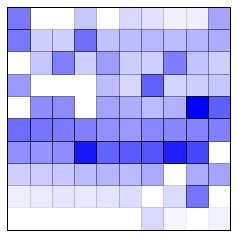

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def colormap(matrix, max_weight=None, ax=None):
    """Draw color map for visualizing probability."""
    ax = ax if ax is not None else plt.gca()

    #ax.patch.set_facecolor('gray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    biggest = np.max(matrix)
    size = 1
    for (x, y), w in np.ndenumerate(matrix):
        
        rect = plt.Rectangle([y, x], size, size, alpha = w/biggest)
        ax.add_patch(rect)

    ax.autoscale_view()
    
size=100

def special(p, pos_start, pos_end):
  p[pos_start]= np.zeros(size+1)
  p[pos_start][pos_start]=1
  
  #make sure that p stays row stocastic
  #i.e the sum of each row must be always kept to 1
  for i in range(size+1):
    pp = p[i][pos_start]
    p[i][pos_start] = 0
    p[i][pos_end]   = p[i][pos_end] + pp

def snake(p, pos_start, pos_end=0):
  if (pos_end<pos_start):
    special(p, pos_start, pos_end)

def ladder(p, pos_start, pos_end=size):
  if (pos_end>pos_start):
    special(p, pos_start, pos_end)

def nullgame():
  p=np.zeros((size+1,size+1))
  
  for i in range(size+1):
    for j in range(6):
      if (i+j<size):
        p[i][i+j+1]=1.0/6.0
  
  p[size][size]=1
  
  p[size-1][size]=6.0/6.0
  p[size-2][size]=5.0/6.0
  p[size-3][size]=4.0/6.0
  p[size-4][size]=3.0/6.0
  p[size-5][size]=2.0/6.0
  p[size-6][size]=1.0/6.0
  
  return p

a=np.zeros(size+1)
p=nullgame()

# add snakes and ladders
full_game = True # whether to add snakes and ladders
if full_game:
    # if starting[i] < ending[i] ladder otherwise snake
    starting = [4,9,17,20,28,40,51,54,62, 64,63,71,93,95,92]
    ending  = [14,31,7,38,84,59,67,34,19, 60,81,91,73,75,78]

    for i in range(0,len(starting)):
        if starting[i] < ending[i]:
            ladder(p,starting[i],ending[i])
        else:
            snake(p,starting[i],ending[i])

#initial matrix is p
m=p
rolls = 10

for k in range(1,rolls):
    
  #calculate the stocastic matrix for iteration k+1
  m=np.dot(m,p)

colormap(np.array(m[0,1:]).reshape(10,10))

We can calculate the (Shannon) entropy at step $n$ using
$$
S^n = -\sum_{j=0}^{100}(P^{(n)}_{0j} \text{ln} P^{(n)}_{0j})
$$
that is we use the probabilities that after $n$ steps the walker has moved from state 0, to state j. The entropy is defined as the sum of these probabilities times the natural log of them.

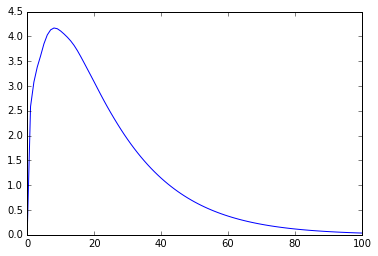

In [16]:
iterations = 100
entropy=np.zeros(iterations+1)
m=p

for k in range(1,iterations+1):
    
  #calculate the stocastic matrix for iteration k+1
  m=np.dot(m,p)
  for i in range(1,size):
      if m[0,i] > 0:
          entropy[k] -= m[0,i]*np.log(m[0,i])

plt.plot(entropy);

We can see that the maximum entropy is at turn 10. If you look at the density plot for this turn you can see why - it is very uncertain (there is not much information) where the walker will be.